# Question 2

In [ ]:


import pandas as pd
import numpy as np

file_path = 'history_ex_3_sh.data'  

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx = i
        columns = line.strip().split()
        break

df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)

age_myr = df['star_age'] / 1e6
h1 = df['center_h1']
he4 = df['center_he4']

h_burn_start = age_myr.iloc[0]
h_burn_end_idx = np.where(h1 < 0.01)[0]
h_burn_end = age_myr[h_burn_end_idx[0]] if len(h_burn_end_idx) > 0 else np.nan
h_burn_duration = h_burn_end - h_burn_start

he_start_idx = np.where((h1 < 0.01) & (he4 > 0.1))[0]
he_end_idx = np.where(he4 < 0.01)[0]

if len(he_start_idx) > 0 and len(he_end_idx) > 0:
    he_burn_start = age_myr[he_start_idx[0]]
    he_burn_end = age_myr[he_end_idx[0]]
    he_burn_duration = he_burn_end - he_burn_start
else:
    he_burn_start = he_burn_end = he_burn_duration = np.nan

print(f"H-core burning duration: {h_burn_duration:.3f} Myr")
print(f"He-core burning duration: {he_burn_duration:.3f} Myr")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\3886296441.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)


H-core burning duration: 11.367 Myr
He-core burning duration: 1.203 Myr


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2392\120688304.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)


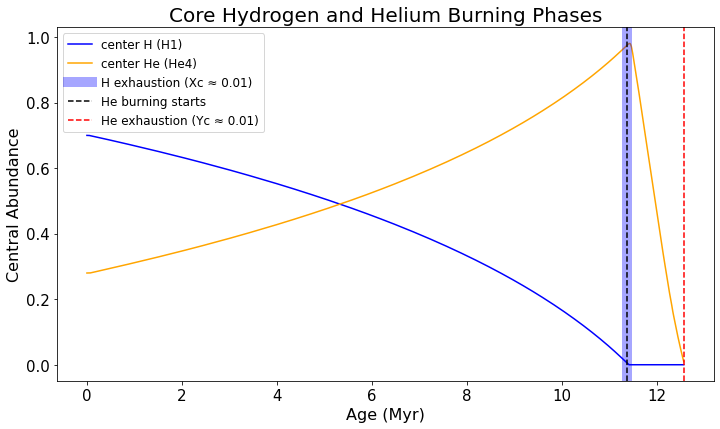

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'history_ex_3_sh.data'

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx = i
        columns = line.strip().split()
        break

df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)

star_age_Myr = df['star_age'].to_numpy() / 1e6
center_h1 = df['center_h1'].to_numpy()
center_he4 = df['center_he4'].to_numpy()

h_exhaust_idx = np.where(center_h1 < 0.01)[0]
h_end = star_age_Myr[h_exhaust_idx[0]] if len(h_exhaust_idx) > 0 else np.nan

he_start_idx = np.where((center_h1 < 0.01) & (center_he4 > 0.1))[0]
he_end_idx = np.where(center_he4 < 0.01)[0]

he_start = star_age_Myr[he_start_idx[0]] if len(he_start_idx) > 0 else np.nan
he_end = star_age_Myr[he_end_idx[0]] if len(he_end_idx) > 0 else np.nan

plt.figure(figsize=(10, 6))
plt.plot(star_age_Myr, center_h1, label='center H (H1)', color='blue')
plt.plot(star_age_Myr, center_he4, label='center He (He4)', color='orange')

if not np.isnan(h_end):
    plt.axvline(h_end, color='blue', linestyle='-', linewidth = 10, label='H exhaustion (Xc ≈ 0.01)', alpha = 0.35)
if not np.isnan(he_start):
    plt.axvline(he_start, color='black', linestyle='--', label='He burning starts')
if not np.isnan(he_end):
    plt.axvline(he_end, color='red', linestyle='--', label='He exhaustion (Yc ≈ 0.01)')

plt.xlabel('Age (Myr)', fontsize=16)
plt.ylabel('Central Abundance', fontsize=16)
plt.title('Core Hydrogen and Helium Burning Phases', fontsize=20)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("ex_3_q.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\3321112256.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)


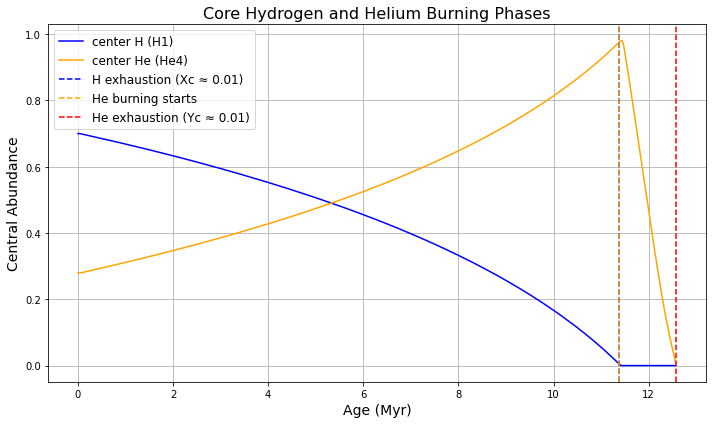

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'history_ex_3_sh.data'

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_idx = i
        columns = line.strip().split()
        break

df = pd.read_csv(file_path, skiprows=header_idx + 1, delim_whitespace=True, names=columns)

star_age_Myr = df['star_age'].to_numpy() / 1e6
center_h1 = df['center_h1'].to_numpy()
center_he4 = df['center_he4'].to_numpy()

h_exhaust_idx = np.where(center_h1 < 0.01)[0]
h_end = star_age_Myr[h_exhaust_idx[0]] if len(h_exhaust_idx) > 0 else np.nan

he_start_idx = np.where((center_h1 < 0.01) & (center_he4 > 0.1))[0]
he_end_idx = np.where(center_he4 < 0.01)[0]

he_start = star_age_Myr[he_start_idx[0]] if len(he_start_idx) > 0 else np.nan
he_end = star_age_Myr[he_end_idx[0]] if len(he_end_idx) > 0 else np.nan

plt.figure(figsize=(10, 6))
plt.plot(star_age_Myr, center_h1, label='center H (H1)', color='blue')
plt.plot(star_age_Myr, center_he4, label='center He (He4)', color='orange')

if not np.isnan(h_end):
    plt.axvline(h_end, color='blue', linestyle='--', label='H exhaustion (Xc ≈ 0.01)')
if not np.isnan(he_start):
    plt.axvline(he_start, color='orange', linestyle='--', label='He burning starts')
if not np.isnan(he_end):
    plt.axvline(he_end, color='red', linestyle='--', label='He exhaustion (Yc ≈ 0.01)')


plt.xlabel('Age (Myr)', fontsize=14)
plt.ylabel('Central Abundance', fontsize=14)
plt.title('Core Hydrogen and Helium Burning Phases', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# Question- 3

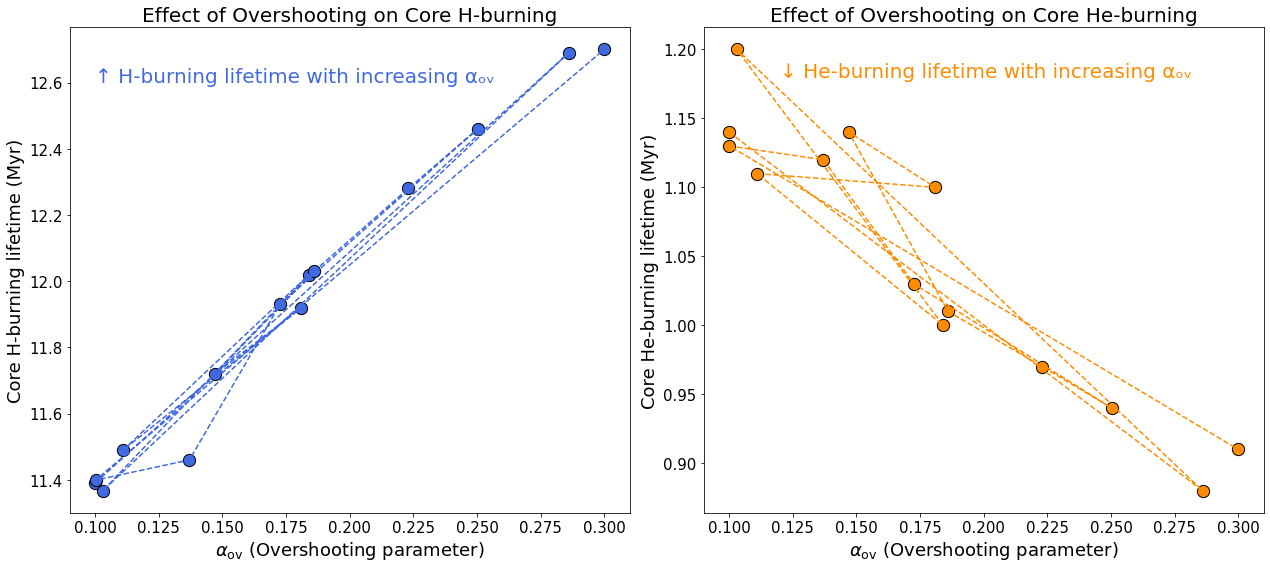

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Name': ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 
'h', 'h', 'h','h'],
    'alpha_ov': [0.100, 0.286, 0.103, 0.184, 0.111, 0.181, 0.147, 0.186, 0.223, 0.250235, 0.1726, 0.137, 0.10014, 0.2999],
    't_core_h_burn_in_Myr': [11.39, 12.69, 11.367, 12.02, 11.49, 11.92, 11.72, 12.03, 12.28, 12.46, 11.93, 11.46, 11.399, 12.7],
    't_core_He_burn_in_Myr': [1.14, 0.88, 1.20, 1.00, 1.11, 1.10, 1.14, 1.01, 0.97, 0.94, 1.03, 1.12, 1.13, 0.91]
}

df = pd.DataFrame(data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.scatter(df['alpha_ov'], df['t_core_h_burn_in_Myr'], color='royalblue', s=150, edgecolor='black')
ax1.plot(df['alpha_ov'], df['t_core_h_burn_in_Myr'], color='royalblue', linestyle='--')
ax1.set_xlabel(r"$\alpha_{\rm ov}$ (Overshooting parameter)", fontsize=18)
ax1.set_ylabel("Core H-burning lifetime (Myr)", fontsize=18)
ax1.set_title("Effect of Overshooting on Core H-burning", fontsize=20)
ax1.tick_params(axis='both', labelsize=16)
ax1.text(0.1, 12.6, "↑ H-burning lifetime with increasing αₒᵥ", fontsize=20, color='royalblue')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.grid(False)

ax2.scatter(df['alpha_ov'], df['t_core_He_burn_in_Myr'], color='darkorange', s=150, edgecolor='black')
ax2.plot(df['alpha_ov'], df['t_core_He_burn_in_Myr'], color='darkorange', linestyle='--')
ax2.set_xlabel(r"$\alpha_{\rm ov}$ (Overshooting parameter)", fontsize=18)
ax2.set_ylabel("Core He-burning lifetime (Myr)", fontsize=18)
ax2.set_title("Effect of Overshooting on Core He-burning", fontsize=20)
ax2.tick_params(axis='both', labelsize=16)
ax2.text(0.12, 1.18, "↓ He-burning lifetime with increasing αₒᵥ", fontsize=20, color='darkorange')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.grid(False)

plt.tight_layout()
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("ex_3_q3.jpg", dpi = 1200)
plt.show()


# Quesion-4

In [ ]:
import pandas as pd
import os

history_file = "history_15_schw_file.data"

with open(history_file, "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_line = i
        break

columns = lines[header_line].strip().split()
df = pd.read_csv(history_file, skiprows=header_line + 1, delim_whitespace=True, names=columns)

profile_nums = df['model_number'].to_numpy()
center_h1 = df['center_h1'].to_numpy()

before_idx = None
after_idx = None

for i in range(1, len(center_h1)):
    if center_h1[i-1] > 1e-6 and center_h1[i] <= 1e-6:
        before_idx = i - 1
        after_idx = i
        break

if before_idx is not None and after_idx is not None:
    before_profile = int(df.iloc[before_idx]['model_number'])
    after_profile = int(df.iloc[after_idx]['model_number'])
    print(f"Use profile{before_profile}.data (before H exhaustion)")
    print(f"Use profile{after_profile}.data (after H exhaustion)")
else:
    print("Could not find appropriate before/after profiles for Xc < 1e-6.")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\4027301868.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(history_file, skiprows=header_line + 1, delim_whitespace=True, names=columns)


Use profile1120.data (before H exhaustion)
Use profile1121.data (after H exhaustion)


In [ ]:
import pandas as pd
import os

history_file = "history_15_le.data"

with open(history_file, "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_line = i
        break

columns = lines[header_line].strip().split()
df = pd.read_csv(history_file, skiprows=header_line + 1, delim_whitespace=True, names=columns)

profile_nums = df['model_number'].to_numpy()
center_h1 = df['center_h1'].to_numpy()

before_idx = None
after_idx = None

for i in range(1, len(center_h1)):
    if center_h1[i-1] > 1e-6 and center_h1[i] <= 1e-6:
        before_idx = i - 1
        after_idx = i
        break

if before_idx is not None and after_idx is not None:
    before_profile = int(df.iloc[before_idx]['model_number'])
    after_profile = int(df.iloc[after_idx]['model_number'])
    print(f"Use profile{before_profile}.data (before H exhaustion)")
    print(f"Use profile{after_profile}.data (after H exhaustion)")
else:
    print("Could not find appropriate before/after profiles for Xc < 1e-6.")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\925099201.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(history_file, skiprows=header_line + 1, delim_whitespace=True, names=columns)


Use profile1071.data (before H exhaustion)
Use profile1072.data (after H exhaustion)


In [ ]:
import pandas as pd
import os

history_file = "history_15_ledoux_file.data"

with open(history_file, "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if 'star_age' in line and not line.startswith('#'):
        header_line = i
        break

columns = lines[header_line].strip().split()
df = pd.read_csv(history_file, skiprows=header_line + 1, delim_whitespace=True, names=columns)

profile_nums = df['model_number'].to_numpy()
center_h1 = df['center_h1'].to_numpy()

before_idx = None
after_idx = None

for i in range(1, len(center_h1)):
    if center_h1[i-1] > 1e-6 and center_h1[i] <= 1e-6:
        before_idx = i - 1
        after_idx = i
        break

if before_idx is not None and after_idx is not None:
    before_profile = int(df.iloc[before_idx]['model_number'])
    after_profile = int(df.iloc[after_idx]['model_number'])
    print(f"Use profile{before_profile}.data (before H exhaustion)")
    print(f"Use profile{after_profile}.data (after H exhaustion)")
else:
    print("Could not find appropriate before/after profiles for Xc < 1e-6.")

    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\640276960.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(history_file, skiprows=header_line + 1, delim_whitespace=True, names=columns)


Use profile1071.data (before H exhaustion)
Use profile1072.data (after H exhaustion)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2392\313581725.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2392\313581725.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)


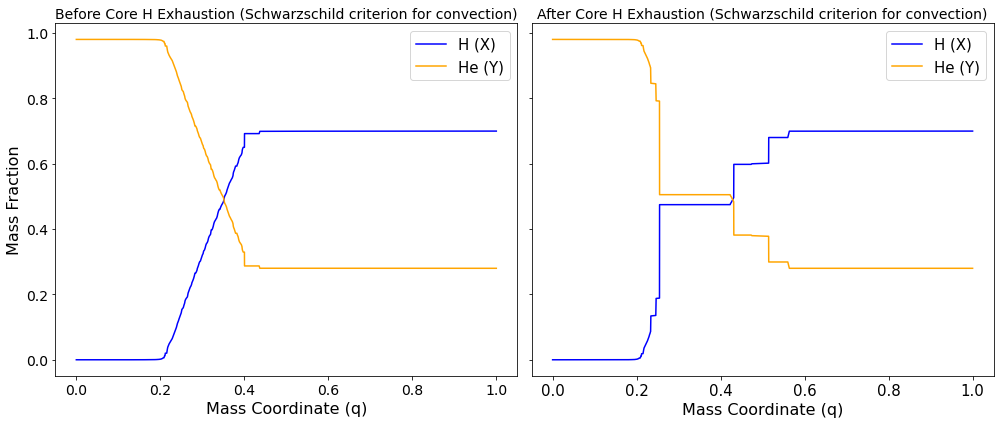

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

def load_profile_data(file_path):
    """Loads a MESA profile.data file into a DataFrame."""
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if line.strip().startswith("zone"):
            header_idx = i
            break

    columns = lines[header_idx].strip().split()
    data = "".join(lines[header_idx + 1:])
    df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)
    return df

profile_before = "AA_exercise_3_data/Schwa/profile14.data" 
profile_after = "AA_exercise_3_data/Schwa/profile15.data"

df_before = load_profile_data(profile_before)
df_after = load_profile_data(profile_after)

q_before = df_before["q"].to_numpy()
h1_before = df_before["x_mass_fraction_H"].to_numpy()
he4_before = df_before["y_mass_fraction_He"].to_numpy()

q_after = df_after["q"].to_numpy()
h1_after = df_after["x_mass_fraction_H"].to_numpy()
he4_after = df_after["y_mass_fraction_He"].to_numpy()

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axs[0].plot(q_before, h1_before, label='H (X)', color='blue')
axs[0].plot(q_before, he4_before, label='He (Y)', color='orange')
axs[0].set_title("Before Core H Exhaustion (Schwarzschild criterion for convection)", fontsize = 14)
axs[0].set_xlabel("Mass Coordinate (q)", fontsize = 16)
axs[0].set_ylabel("Mass Fraction", fontsize = 16)
axs[0].legend(fontsize = 15)
axs[0].grid(False)
axs[0].tick_params(axis='both', which='major', labelsize=14)

axs[1].plot(q_after, h1_after, label='H (X)', color='blue')
axs[1].plot(q_after, he4_after, label='He (Y)', color='orange')
axs[1].set_title("After Core H Exhaustion (Schwarzschild criterion for convection)", fontsize = 14)
axs[1].set_xlabel("Mass Coordinate (q)", fontsize = 16)
axs[1].legend(fontsize = 15)
axs[1].grid(False)
axs[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("ex_3_q4_1.jpg", dpi = 1200)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2392\2216076029.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2392\2216076029.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)


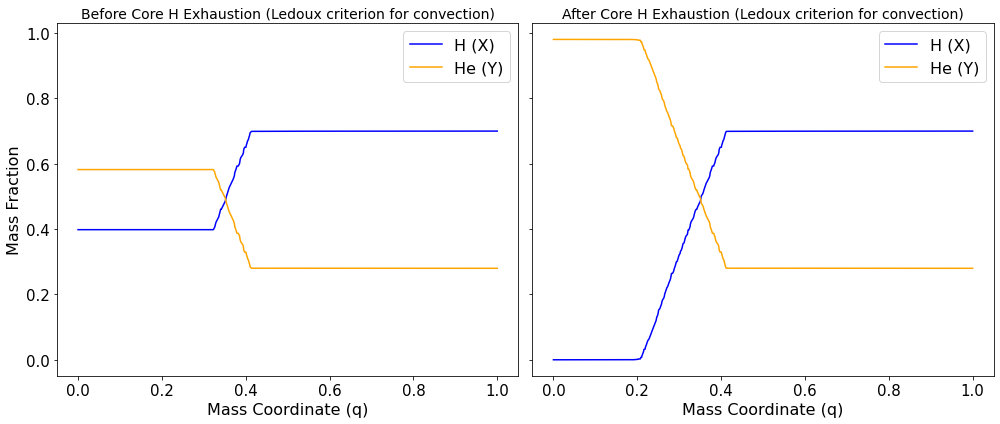

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

def load_profile_data(file_path):
    """Loads a MESA profile.data file into a DataFrame."""
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if line.strip().startswith("zone"):
            header_idx = i
            break

    columns = lines[header_idx].strip().split()
    data = "".join(lines[header_idx + 1:])
    df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)
    return df

profile_before = "AA_exercise_3_data/le/profile12.data"
profile_after = "AA_exercise_3_data/le/profile13.data"

df_before = load_profile_data(profile_before)
df_after = load_profile_data(profile_after)

q_before = df_before["q"].to_numpy()
h1_before = df_before["x_mass_fraction_H"].to_numpy()
he4_before = df_before["y_mass_fraction_He"].to_numpy()

q_after = df_after["q"].to_numpy()
h1_after = df_after["x_mass_fraction_H"].to_numpy()
he4_after = df_after["y_mass_fraction_He"].to_numpy()

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axs[0].plot(q_before, h1_before, label='H (X)', color='blue')
axs[0].plot(q_before, he4_before, label='He (Y)', color='orange')
axs[0].set_title("Before Core H Exhaustion (Ledoux criterion for convection)", fontsize = 14)
axs[0].set_xlabel("Mass Coordinate (q)", fontsize = 16)
axs[0].set_ylabel("Mass Fraction", fontsize = 16)
axs[0].legend(fontsize = 16)
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].grid(False)

axs[1].plot(q_after, h1_after, label='H (X)', color='blue')
axs[1].plot(q_after, he4_after, label='He (Y)', color='orange')
axs[1].set_title("After Core H Exhaustion (Ledoux criterion for convection)", fontsize = 14)
axs[1].set_xlabel("Mass Coordinate (q)", fontsize = 16)
axs[1].legend(fontsize = 16)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].grid(False)

plt.tight_layout()
plt.savefig("ex_3_q4_2.jpg", dpi = 1200)
plt.show()
